In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.dates import DateFormatter

sns.set()
%config InlineBackend.figure_format = 'retina'

pd.set_option("display.precision", 2)
mpl.rcParams['timezone'] = 'UTC'

In [184]:
DATA_URL="../data/raw_sales.csv"
ACCURACIES_URL="../results/accuracies_monthly.csv"

In [185]:
df = pd.read_csv(DATA_URL)
df.columns


Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms'], dtype='object')

In [186]:
res = pd.read_csv(ACCURACIES_URL)
res.columns

Index(['Unnamed: 0', 'num_lags', 'accuracy'], dtype='object')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [188]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [189]:
df['datesold'] = pd.to_datetime(df['datesold'], format="%Y-%m-%d %H:%M:%S")
df = df[df['propertyType'] == "house"]
df.dropna()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
24547,2019-07-26,2617,610000,house,3
24548,2019-07-26,2902,657500,house,4
24549,2019-07-27,2905,610000,house,4
24550,2019-07-27,2615,647500,house,4


In [190]:

df = df[df["datesold"] < "2023-02-07"]

In [191]:
colors =['red', 'pink', 'limegreen', 'violet', 'cyan']

color_dict = dict(zip(np.unique(df['bedrooms']),colors))

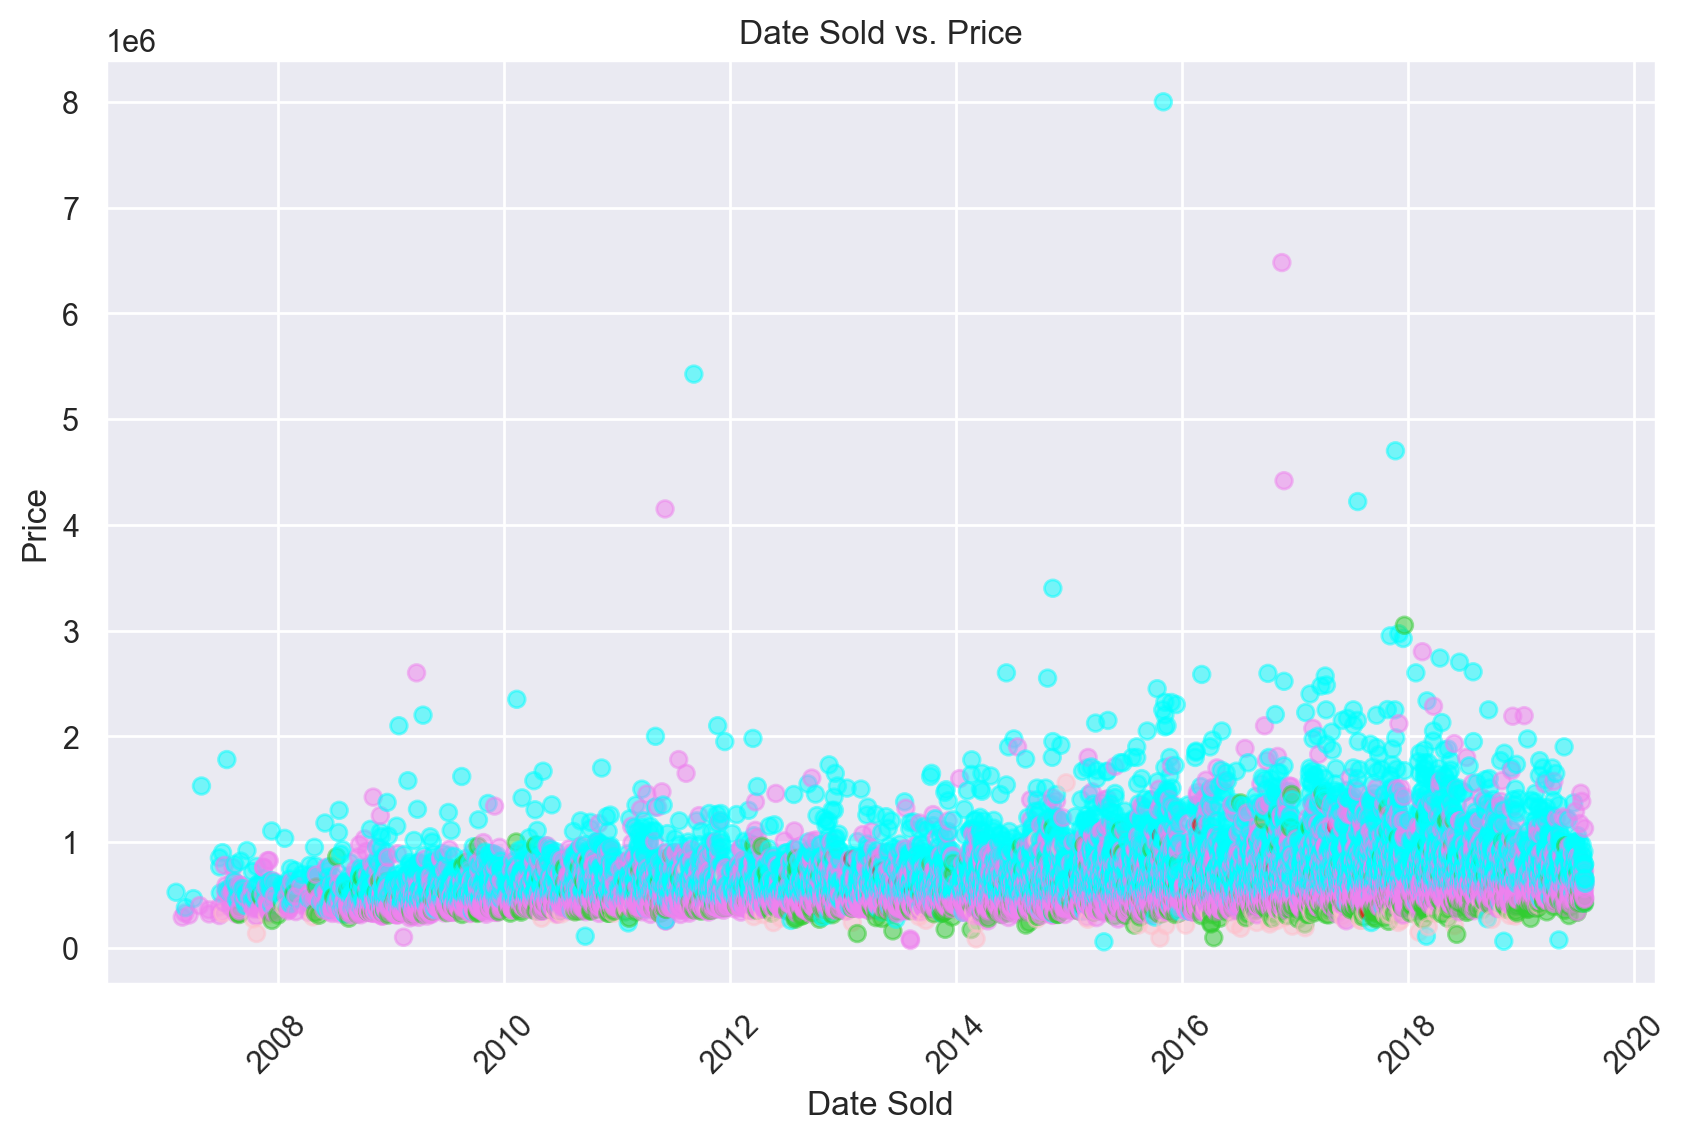

In [192]:



# df=df[np.unique(df["datesold"])]
data = df[df["bedrooms"] < 5]
plt.figure(figsize=(10, 6))
plt.scatter(data['datesold'], data['price'], 
            c= data['bedrooms'].map(color_dict), 
            alpha=0.5)
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.title('Date Sold vs. Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

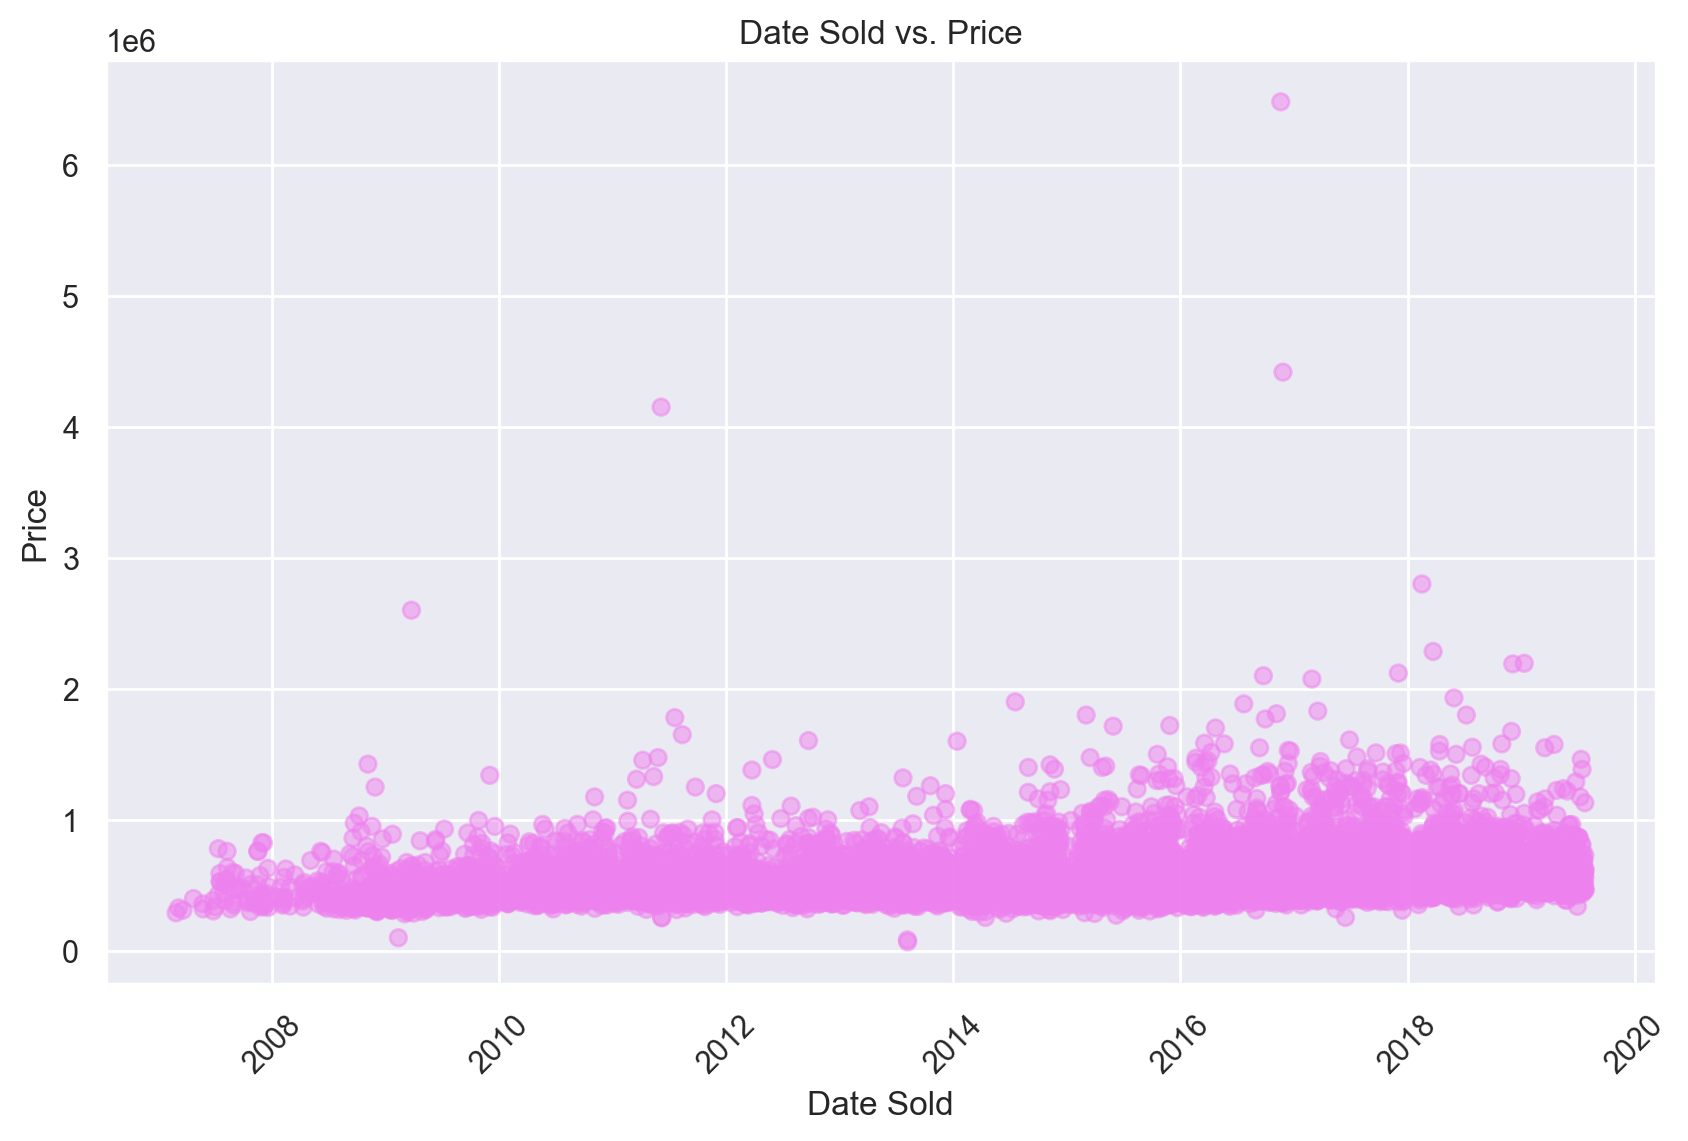

In [193]:
data=df[df['bedrooms']==3]
plt.figure(figsize=(10, 6))
plt.scatter(data['datesold'], data['price'], 
            c= data['bedrooms'].map(color_dict), 
            alpha=0.5)
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.title('Date Sold vs. Price')
plt.xticks(rotation=45)  
plt.show()

In [194]:

# data = df[["datesold", "price", "bedrooms"]]
# data.groupby(["datesold", "bedrooms"]).mean()
# data = data[data["bedrooms"] == 3][["datesold", "price"]]
# # data["datesold"] =data["datesold"].map(int)

# fig, ax = plt.subplots(figsize=(10, 7))

# data.plot("datesold", "price", ax=ax)
# plt.title("Time vs Price for 3 bedroom houses")
# plt.xlabel('Time')
# plt.ylabel("Price ($m)")

# date_form = DateFormatter("%m-%Y")
# ax.xaxis.set_major_formatter(date_form)

# data.plot()


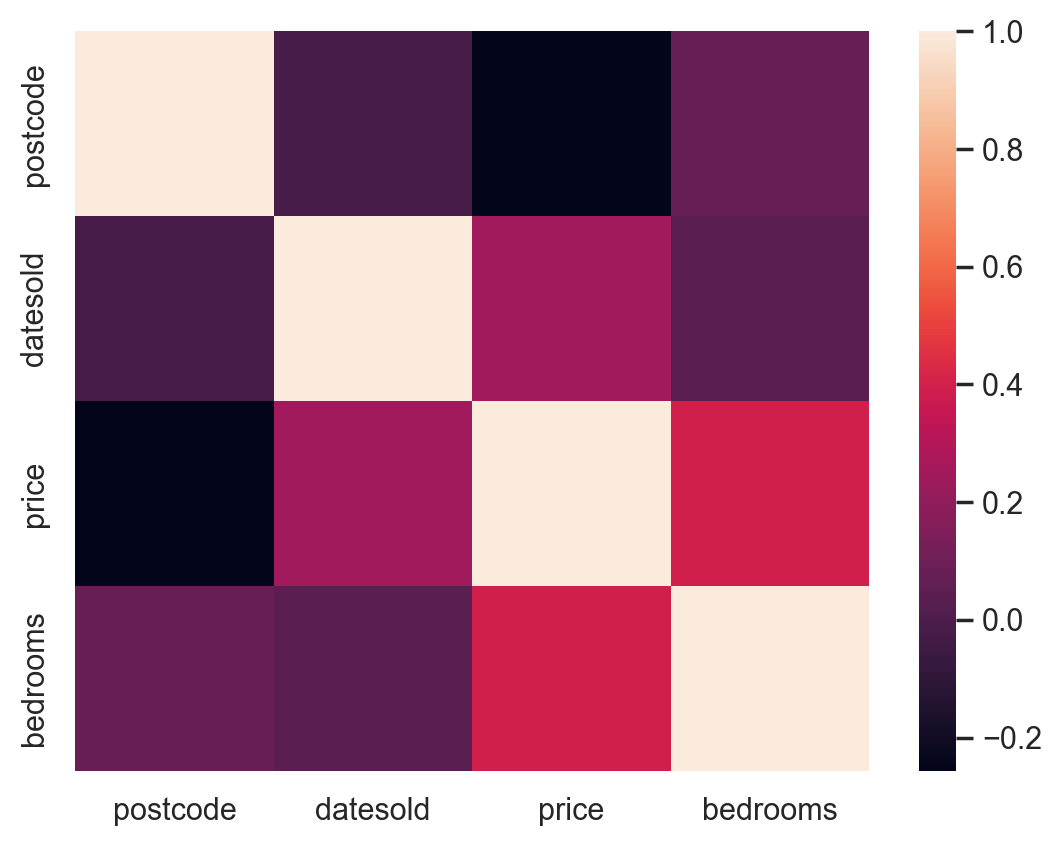

In [195]:
data = df 
data["datesold"] = data["datesold"].map(lambda x: x.timestamp())

numerical = list(set(data.columns) - set(["propertyType"]))

# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);


Results

Predicting tommorow's price:

In [196]:

res.info()
res.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  29 non-null     int64  
 1   num_lags    29 non-null     float64
 2   accuracy    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 828.0 bytes


,Unnamed: 0,num_lags,accuracy
0,0,1.0,0.50
1,1,2.0,0.62
2,2,3.0,0.67
3,3,4.0,0.68
4,4,5.0,0.68


In [197]:
res = res.drop(columns=["Unnamed: 0"])

<Axes: xlabel='num_lags'>

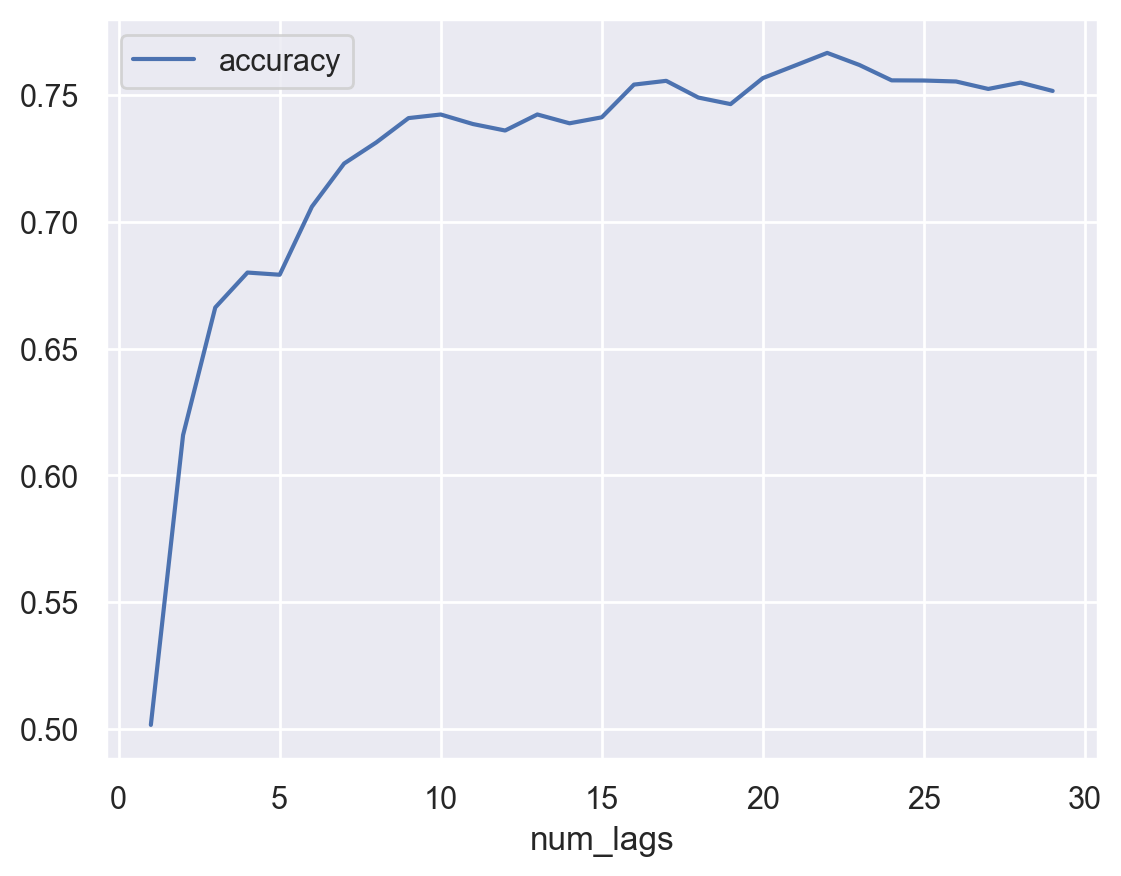

In [198]:
res.groupby("num_lags").sum().plot()

In [199]:
df.groupby("bedrooms").count()

,datesold,postcode,price,propertyType
bedrooms,,,,
0,19,19,19,19
1,95,95,95,95
2,806,806,806,806
3,11281,11281,11281,11281
4,10404,10404,10404,10404
5,1947,1947,1947,1947
